# Linear Regression Using Python

Regression is a powerful analysis that can analyze multiple variables simultaneously to answer complex research questions.

It is often used to describe the relationships between a set of independent variables and the dependent variable.

For this task, we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. the dependent and independent variables are presented as the following:

#### X: No. of study hours
#### Y: Percentage of score



### Author: Miguel Angel Rizzo Gonzalez.
Sources:
https://statisticsbyjim.com/regression/ols-linear-regression-assumptions/
https://statisticsbyjim.com/regression/when-use-regression-analysis/

In [2]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline
print('Libraries imported!')

Libraries imported!


In [3]:
## Reading the dataset from a Url
url = "http://bit.ly/w-data"
## read the comma separated value (csv) from url and load it into a Pandas Dataframe
data = pd.read_csv(url)
print("Data loaded!")

Data loaded!


In [4]:
# Show the first 5 rows
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Let's use descriptive statistics to have a better perspective of our dataset, Boxplots (to check for outliers), scatterplots (to display the relationship bewtween the variables) will be used for our analysis.


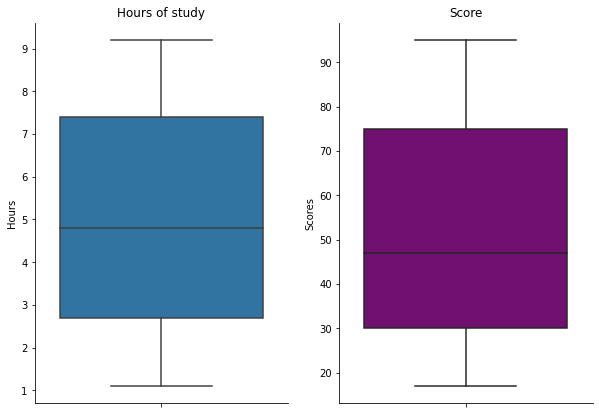

In [5]:
### Boxplots
fig, axs = plt.subplots(ncols=2,figsize=(10,7))
sns.boxplot(y="Hours",data=data,ax=axs[0]).set_title('Hours of study')
sns.boxplot(y="Scores",data=data,ax=axs[1],color='purple').set_title('Score')
sns.despine()

#### From this graph, we can conclude that there are no outliers in our model data

Text(0, 0.5, 'Percentage Score')

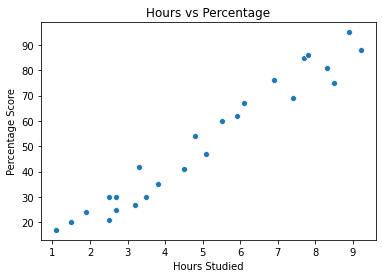

In [6]:
## Scatterplot

sns.scatterplot(data=data,x="Hours",y="Scores")
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')

#### This graph depicts a strong positive relationship between hours of study and percentage score

### Building and training the model

In [7]:
#Adding the Constant for the regression model
data['constant']=0
#Independent variable (input)
x = data.Hours.values.reshape(-1,1)
#Dependent variable (output)
y = data.Scores.values.reshape(-1,1)

#### Train-Test Split for Evaluating Machine Learning Algorithms
The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

In [8]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 


We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [9]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


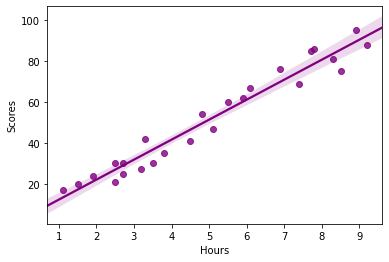

In [22]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting the regression line
sns.regplot(x="Hours",y="Scores",data=data,color='purple',fit_reg=True,truncate=False)

## Predicting Outcomes
Now that the model is trained, lets make predictions about our test set


In [11]:
y_pred=regressor.predict(x_test) # Testing data- not used to train the model
print(x_test)# Predicted Scores using regression equation
#Convert to one dimensionals
y_pred=y_pred.flatten()
y_test=y_test.flatten()
print(y_test.ndim,y_pred.ndim)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
1 1


In [12]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [23]:
## Predict the test score of a student who studied for 9.25 hours a day
H=9.25
pred_score = regressor.coef_*H+regressor.intercept_

print('The predicted score if a student studies ' +str(H)+ ' Hrs/Day' ' is ' + str(pred_score)[2:-2])

The predicted score if a student studies 9.25 Hrs/Day is 93.69173249


## Model evaluation
As a measure for model accuracy, we will use the mean absolute error (MAE). The MAE measures the average magnitude of the errors in a set of forecasts, without considering their direction. It measures accuracy for continuous variables. There are other methods for evaluating prediction accuracy, but for this particular case the mean absolute error is a great alternative since we consider that there are no large errors (check regression plot) and we want the individual differences to be equally weighted.

In [14]:
from sklearn.metrics import mean_absolute_error
import math
mae = mean_absolute_error(y_pred,y_test)
print('MAE : '+str(mae))

MAE : 4.183859899002975
